# 분류

## #01. 분류와 군집의 차이

- 분류와 군집은 모두 데이터를 특정한 집단으로 나눈다는 점에서는 공통점이 있다.

|이름|설명|구분|알고리즘|
|---|---|---|---|
|분류|소속집단의 정보를 이미 알고 있는 상태에서, 새로운 데이터를 비슷한 집단으로 묶는 방법|종속변수O = 지도학습| K-NN |
|군집|소속집단의 정보가 없는 상태에서 비슷한 집단으로 묶는 방법|종속변수X = 비지도학습| K-means |

## #02. 분류 예제

![img1](./res/img1.png)

> 산점도 그래프의 위쪽에 분포한 녹색 점은 진돗개이고, 아래쪽에 붉은 점은 닥스훈트 종이다.

### 1. K-NN 알고리즘

K-최근접 이웃(K-Nearest Neighbor)

특정 공간에 분포하는 데이터에 대하여 k개의 가장 가까운 이웃을 살펴보고 다수결의 방식으로 데이터 레이블을 할당하는 분류 방식

### 2. K-NN의 특징

![img2](./res/img2.png)

- k-NN 알고리즘은 k의 값에 따라 결과가 달라진다.
- 단순히 이웃의 수를 계산하는 것이 아니라 이웃과의 거리에 가중치(wi)를 부여하는 모델을 만들 수 있다. 
- 새로 입력된 데이터와 가까운 위치의 점들은 더 낮은 가중치를 얻고, 먼 점들은 더 높은 가중치를 갖도록 한다. 
- 알고리즘이 매우 단순하고 직관적이며, 사전학습이나 특별한 준비시간이 필요 없다는 점은 장점
- 데이터 수가 많다면 많은 메모공간과 계산 시간이 필요하다는 단점이 있다. 

## #03. 패키지 참조

In [1]:
from pandas import read_excel, DataFrame
from matplotlib import pyplot as plt
import seaborn as sb

# 데이터 표준화 패키지
from sklearn.preprocessing import StandardScaler

# K-NN 분류를 위한 패키지 참조
from sklearn.neighbors import KNeighborsClassifier

# 분류 결과 판정을 위한 패키지
from sklearn import metrics

# 경고메세지 무시하기
import warnings
warnings.filterwarnings('ignore')

## #04. 데이터 가져오기

In [2]:
origin = read_excel('https://data.hossam.kr/G02/dogs.xlsx')
origin

,dog,length,height
0,d,55,30
1,d,57,31
2,d,64,36
3,d,63,30
4,d,58,33
5,d,49,25
6,d,54,37
7,d,61,34
8,j,56,52
9,j,47,52


## #05. 데이터 분포 확인

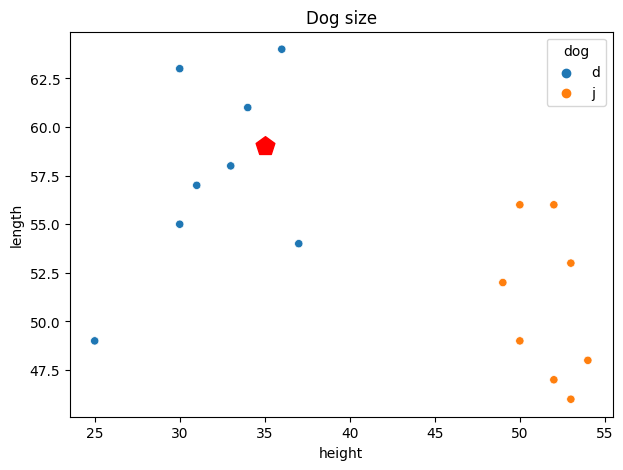

In [3]:
plt.figure(figsize=(7,5))
sb.scatterplot(data=origin, x='height', y='length', hue='dog')
plt.xlabel("height")
plt.ylabel("length")
plt.title("Dog size")

# 새로운 데이터 투입
newdata_length = [59]
newdata_height = [35]
plt.scatter(newdata_height, newdata_length, marker="p", s=200, c='r', label='new_data')

plt.show()
plt.close()


## #06. K-NN 분류 모델 구성

### 종속변수 라벨링

In [4]:
df = origin.copy()
df['dog'] = df['dog'].map({'d':0, 'j':1})

In [5]:
df

,dog,length,height
0,0,55,30
1,0,57,31
2,0,64,36
3,0,63,30
4,0,58,33
5,0,49,25
6,0,54,37
7,0,61,34
8,1,56,52
9,1,47,52


### 독립변수, 종속변수 분리

In [6]:
x = df.drop('dog', axis=1)
x

,length,height
0,55,30
1,57,31
2,64,36
3,63,30
4,58,33
5,49,25
6,54,37
7,61,34
8,56,52
9,47,52


In [7]:
y = df[['dog']]
y

,dog
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,1
9,1


### 분류 모델 구성

In [8]:
# 근접 이웃의 수를 3으로 설정
k = 3

# 모델구성
knn = KNeighborsClassifier(n_neighbors=k)

# 모델학습
fit = knn.fit(x,y)
fit

KNeighborsClassifier(n_neighbors=3)

### 학습결과 확인

In [9]:
y_pred = knn.predict(x) #tensorflow는 fit.predict
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

### 새로운 데이터 투입

In [10]:
# sklearn에 배열 데이터를 전달할 경우 2차원으로 구성해야 한다. 
newdata_length = [59]
newdata_height = [35]
new_data = [[newdata_length[0], newdata_height[0]]]

dog_classes = {0:'닥스훈트', 1:'진돗개'}
new_pred = knn.predict(new_data)

print("데이터: ", new_data ," 예측 :", dog_classes[new_pred[0]])

데이터:  [[59, 35]]  예측 : 닥스훈트


### K-NN에서 이웃한 데이터 얻기

In [11]:
dist, indexs = knn.kneighbors(new_data, k)

#거리
print("거리:", dist)

#인덱스
print("인덱스:", indexs)

거리: [[2.23606798 2.23606798 4.47213595]]
인덱스: [[4 7 1]]


> 4,7,1번째 데이터

### 이웃의 실 데이터 확인

In [12]:
neighbor_data = origin.values[indexs]
neighbor_data

array([[['d', 58, 33],
        ['d', 61, 34],
        ['d', 57, 31]]], dtype=object)

### 분류 결과 시각화

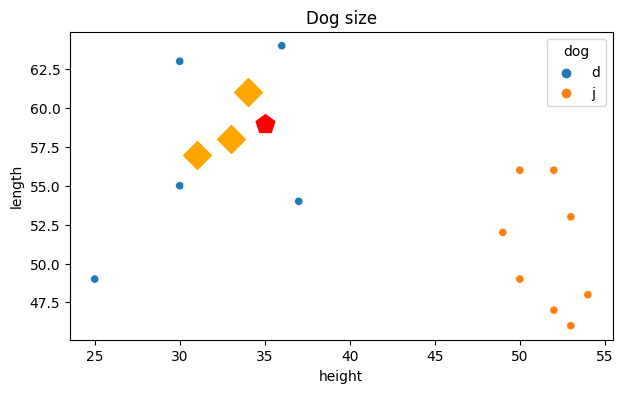

In [13]:
plt.figure(figsize=(7,4))

sb.scatterplot(data=origin, x='height', y='length', hue='dog')
plt.xlabel('height')
plt.ylabel('length')
plt.title('Dog size')

# 새로운 데이터 투입
newdata_length = [59]
newdata_height = [35]
plt.scatter(newdata_height, newdata_length, marker='p', s=200, c='r', label='new_data')

# 근접 이웃 표시
for i, v in enumerate(neighbor_data[0]):
    plt.scatter(v[2], v[1], marker='D', s=200, c='orange', label='neighbor')

## #07. 데이터 표준화 적용
### 독립변수에 대한 표준화

In [14]:
scaler = StandardScaler()
std_x = scaler.fit_transform(x)
std_x

array([[ 0.13882344, -1.15746348],
       [ 0.50901929, -1.05947716],
       [ 1.80470477, -0.56954552],
       [ 1.61960685, -1.15746348],
       [ 0.69411722, -0.8635045 ],
       [-0.97176411, -1.64739511],
       [-0.04627448, -0.4715592 ],
       [ 1.249411  , -0.76551818],
       [ 0.32392137,  0.9982357 ],
       [-1.34195996,  0.9982357 ],
       [ 0.32392137,  0.80226305],
       [-1.52705788,  1.09622203],
       [-0.97176411,  0.80226305],
       [-0.23137241,  1.09622203],
       [-0.41647033,  0.70427672],
       [-1.15686203,  1.19420835]])

### 새로운 분류 대상에 대한 표준화

In [15]:
std_new_data = scaler.transform(new_data)
std_new_data

array([[ 0.87921515, -0.66753185]])

### K-NN 분류기 생성

In [16]:
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(std_x, y)
y_pred = knn.predict(std_x)
print("측정치: ", y.values)
print("분류결과:", y_pred)

측정치:  [[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
분류결과: [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]


### 새로운 분류 대상 투입

In [17]:
# 새로운 데이터에 대한 분류 결과
new_data_pred = knn.predict(std_new_data)
print("데이터: ", new_data_pred ," 예측 :", dog_classes[new_pred[0]])

# 근접한 이웃의 거리와 인덱스
dist, indexs = knn.kneighbors(std_new_data, k)
print("거리:", dist, '인덱스:', indexs)

데이터:  [0]  예측 : 닥스훈트
거리: [[0.26956729 0.38294424 0.53913458 0.88781354 0.88781354]] 인덱스: [[4 7 1 0 3]]


### 표준화 적용 결과와 분류 결과 시각화

#### 표준화 결과에 대한 임시 데이터프레임 생성

In [18]:
tmp_df = DataFrame(std_x, columns=['length', 'height'])
tmp_df['dog'] = y
tmp_df

,length,height,dog
0,0.138823,-1.157463,0
1,0.509019,-1.059477,0
2,1.804705,-0.569546,0
3,1.619607,-1.157463,0
4,0.694117,-0.863505,0
5,-0.971764,-1.647395,0
6,-0.046274,-0.471559,0
7,1.249411,-0.765518,0
8,0.323921,0.998236,1
9,-1.341960,0.998236,1


In [21]:
neighbor_data = tmp_df.values[indexs]
neighbor_data

array([[[ 0.69411722, -0.8635045 ,  0.        ],
        [ 1.249411  , -0.76551818,  0.        ],
        [ 0.50901929, -1.05947716,  0.        ],
        [ 0.13882344, -1.15746348,  0.        ],
        [ 1.61960685, -1.15746348,  0.        ]]])

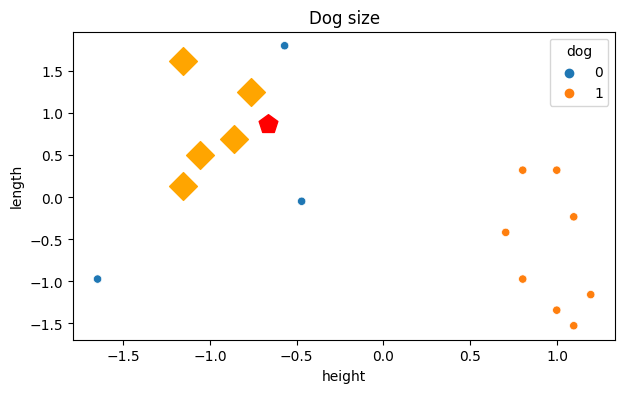

In [22]:
plt.figure(figsize=(7,4))

sb.scatterplot(data=tmp_df, x='height', y='length', hue='dog')
plt.xlabel('height')
plt.ylabel('length')
plt.title('Dog size')

# 새로운 데이터 투입
plt.scatter(std_new_data[0][1], std_new_data[0][0], marker='p', s=200 ,c='r', label='new data')

# 근접이웃 표시
for i, v in enumerate(neighbor_data[0]):
    plt.scatter(v[1], v[0], marker='D', s=200, c='orange', label='neighbor')
    
plt.show()
plt.close()

In [20]:
# # 코드 참조
# from sklearn.datasets import load_iris
# iris = load_iris()
# # 독립변수 가져오기
# values = iris.data
# # 독립변수의 이름가져오기
# feature_names = iris.feature_names
# #종속변수(레이블) 가져오기
# target = iris.target